From sklearn.datasets load digits dataset and do following

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
2. Plot confusion matrix
3. Plot classification report

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [12]:
# loading data set
data_set = load_digits()
dir(data_set)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_set.data,data_set.target,test_size=0.2,random_state=10)

In [14]:
neighbour = range(1,20)

clf = RandomizedSearchCV(KNeighborsClassifier(),
    {'n_neighbors' : neighbour},
    n_iter=10,
    cv=5,
    return_train_score=False
)

In [21]:
model = clf.fit(x_train,y_train)
# joblib.dump(model,"model.job")
model

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)})

In [16]:
clf.score(x_test,y_test)

0.9888888888888889

In [17]:
cn = confusion_matrix(y_test,model.predict(x_test))
cn

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0, 37]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predected values')

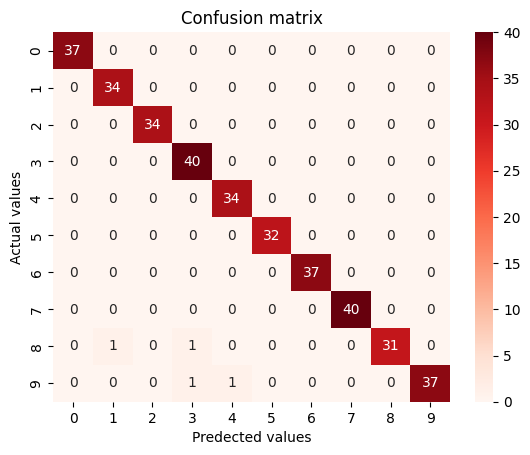

In [18]:
sns.heatmap(cn,annot=True,cmap='Reds')
plt.title("Confusion matrix")
plt.ylabel("Actual values")
plt.xlabel("Predected values")

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        34
           3       0.95      1.00      0.98        40
           4       0.97      1.00      0.99        34
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       1.00      0.94      0.97        33
           9       1.00      0.95      0.97        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

